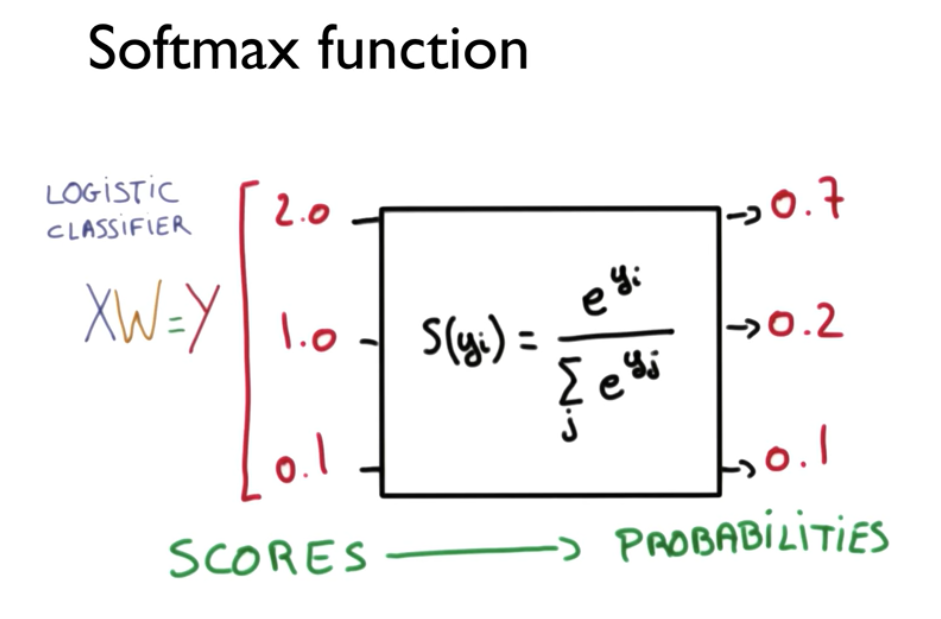

In [3]:
import tensorflow as tf

x_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5], 
         [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]

#one-hot encoding
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], 
          [0, 1, 0], [1, 0, 0], [1, 0, 0]]

X = tf.placeholder('float', [None, 4])
Y = tf.placeholder('float', [None, 3])
nb_classes = 3

# 4는 x의 값, nb는 y.
W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))
    
    # Testing & One-hot encoding
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9], 
                                          [1, 3, 4, 3,], 
                                         [1, 1, 0, 1]]})
    print()
    print(a, sess.run(tf.arg_max(a, 1)))

0 3.100644
200 0.64652455
400 0.5439565
600 0.4548752
800 0.36641094
1000 0.27746856
1200 0.22534885
1400 0.20525019
1600 0.18829735
1800 0.17382306
2000 0.16133377

Instructions for updating:
Use `tf.math.argmax` instead
[[1.5979605e-02 9.8400992e-01 1.0476252e-05]
 [7.5813079e-01 2.1183115e-01 3.0038033e-02]
 [1.8348405e-08 3.6473884e-04 9.9963522e-01]] [1 0 2]
